In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D,MaxPool2D
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

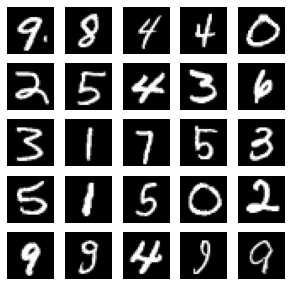

[5 0 4 ... 5 6 8]


In [ ]:
indexes=np.random.randint(0,X_train.shape[0],size=25)
images=X_train[indexes]
labels=y_train[indexes]


plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]
  plt.imshow(image,cmap='gray')
  plt.axis('off')
plt.show()
print(y_train)

In [ ]:
#LE-Net 
model=Sequential()
#conv 1

model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),
                 padding='valid',activation='tanh'
                 ,input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
#conv 2

model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),
                 padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
# Flat
model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

history=model.fit(X_train,y_train,batch_size=128,epochs=15,
          validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


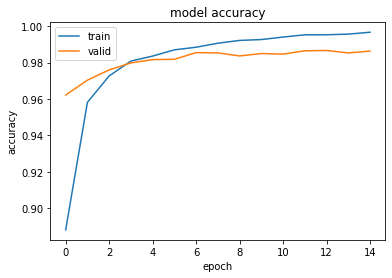

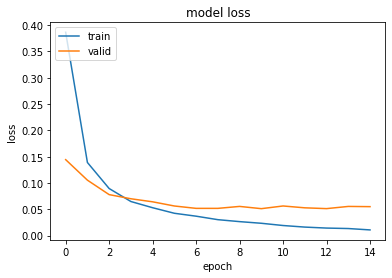

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_train,y_train,batch_size=128)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test,batch_size=128)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

469/469 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9959
Training Accuracy: 99.59%

79/79 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9874
Testing Accuracy: 98.74%



In [ ]:
model.save("mnist_model.h5")